# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Data

In [2]:
parse_dates = ['asset_contract.created_date', 'collection.created_date']
df = pd.read_csv('../data/2_data_condensed.csv', low_memory=False, parse_dates=parse_dates)

In [3]:
df.head()

,num_sales,sell_orders,last_sale.event_type,id,token_id,name,traits,description,is_presale,image_url,...,collection.medium_username,collection.chat_url,creator.user.username,creator.config,creator.profile_img_url,creator.discord_id,owner.address,owner.config,owner.profile_img_url,owner.discord_id
0,0,NaN,NaN,30033345,9132198125583360689797322472203169750011716430...,Chad Olozumin,[],NaN,True,https://storage.opensea.io/files/b09d044f17573...,...,NaN,NaN,CryptoHamstersOfficial,NaN,https://storage.googleapis.com/opensea-static/...,NaN,0x0000000000000000000000000000000000000000,NaN,https://storage.googleapis.com/opensea-static/...,NaN
1,0,NaN,NaN,30033344,3268304683559065074852929730958675774624902165...,IconPunk #149 Elton John,"[{'trait_type': 'id', 'value': '0149', 'displa...",24x24 pixels and pushing the limit to the max!...,True,https://lh3.googleusercontent.com/P7NXQatzHWTt...,...,NaN,NaN,iconpunks,NaN,https://storage.googleapis.com/opensea-static/...,NaN,0x0000000000000000000000000000000000000000,NaN,https://storage.googleapis.com/opensea-static/...,NaN
2,0,NaN,NaN,30033343,7779220728716121010175700030620486582973273824...,PlagueDoctor #234,"[{'trait_type': 'id', 'value': '234', 'display...",Where are the sick - There I Am. Healing since...,True,https://lh3.googleusercontent.com/qCzcK3sEGp2R...,...,NaN,NaN,PlagueDr,NaN,https://storage.googleapis.com/opensea-static/...,NaN,0x0000000000000000000000000000000000000000,NaN,https://storage.googleapis.com/opensea-static/...,NaN
3,0,NaN,NaN,30033342,9510190511962339173712504282354773321324120343...,Crypto Graphic #47/999,[],#crypto #abstract #art #collectible #rarible #...,True,https://lh3.googleusercontent.com/iDHrRY_ko62L...,...,NaN,NaN,Vezzen_Dragon,NaN,https://storage.googleapis.com/opensea-static/...,NaN,0x0000000000000000000000000000000000000000,NaN,https://storage.googleapis.com/opensea-static/...,NaN
4,0,NaN,NaN,30033341,1029511648543007736247727748847500291464805430...,380,"[{'trait_type': 'Clothes', 'value': 'Tanktop',...",NaN,True,https://lh3.googleusercontent.com/LrBXq8LND7W-...,...,NaN,NaN,BoredAlien,NaN,https://storage.googleapis.com/opensea-static/...,NaN,0x0000000000000000000000000000000000000000,NaN,https://storage.googleapis.com/opensea-static/...,NaN


# Engineer Target

In [4]:
(df['num_sales'] > 0).value_counts(normalize=True)

False    0.546255
True     0.453745
Name: num_sales, dtype: float64

In [5]:
df['last_sale.event_type'].notna().sum()/len(df)

0.35111279942795853

In [6]:
df['sell_orders'].notna().sum()/len(df)

0.22461565963532357

In [7]:
len(df[(df['num_sales'] > 0) | 
       (df['sell_orders'].notna()) | 
       (df['last_sale.event_type'].notna())])/len(df)

0.6027663568108688

In [8]:
df['target'] = np.where((df['num_sales'] > 0) | 
                        (df['sell_orders'].notna()) | 
                        (df['last_sale.event_type'].notna()), 1, 0)

In [9]:
df['target'].value_counts(normalize=True)

1    0.602766
0    0.397234
Name: target, dtype: float64

In [10]:
df = df.drop(labels = ['num_sales', 'sell_orders', 'last_sale.event_type'], axis=1)
df.head()

,id,token_id,name,traits,description,is_presale,image_url,background_color,external_link,token_metadata,...,collection.chat_url,creator.user.username,creator.config,creator.profile_img_url,creator.discord_id,owner.address,owner.config,owner.profile_img_url,owner.discord_id,target
0,30033345,9132198125583360689797322472203169750011716430...,Chad Olozumin,[],NaN,True,https://storage.opensea.io/files/b09d044f17573...,NaN,https://cryptohamsters.co/hamsters/16250054780...,NaN,...,NaN,CryptoHamstersOfficial,NaN,https://storage.googleapis.com/opensea-static/...,NaN,0x0000000000000000000000000000000000000000,NaN,https://storage.googleapis.com/opensea-static/...,NaN,0
1,30033344,3268304683559065074852929730958675774624902165...,IconPunk #149 Elton John,"[{'trait_type': 'id', 'value': '0149', 'displa...",24x24 pixels and pushing the limit to the max!...,True,https://lh3.googleusercontent.com/P7NXQatzHWTt...,NaN,NaN,NaN,...,NaN,iconpunks,NaN,https://storage.googleapis.com/opensea-static/...,NaN,0x0000000000000000000000000000000000000000,NaN,https://storage.googleapis.com/opensea-static/...,NaN,0
2,30033343,7779220728716121010175700030620486582973273824...,PlagueDoctor #234,"[{'trait_type': 'id', 'value': '234', 'display...",Where are the sick - There I Am. Healing since...,True,https://lh3.googleusercontent.com/qCzcK3sEGp2R...,NaN,NaN,NaN,...,NaN,PlagueDr,NaN,https://storage.googleapis.com/opensea-static/...,NaN,0x0000000000000000000000000000000000000000,NaN,https://storage.googleapis.com/opensea-static/...,NaN,0
3,30033342,9510190511962339173712504282354773321324120343...,Crypto Graphic #47/999,[],#crypto #abstract #art #collectible #rarible #...,True,https://lh3.googleusercontent.com/iDHrRY_ko62L...,NaN,NaN,NaN,...,NaN,Vezzen_Dragon,NaN,https://storage.googleapis.com/opensea-static/...,NaN,0x0000000000000000000000000000000000000000,NaN,https://storage.googleapis.com/opensea-static/...,NaN,0
4,30033341,1029511648543007736247727748847500291464805430...,380,"[{'trait_type': 'Clothes', 'value': 'Tanktop',...",NaN,True,https://lh3.googleusercontent.com/LrBXq8LND7W-...,NaN,NaN,NaN,...,NaN,BoredAlien,NaN,https://storage.googleapis.com/opensea-static/...,NaN,0x0000000000000000000000000000000000000000,NaN,https://storage.googleapis.com/opensea-static/...,NaN,0


# Explore

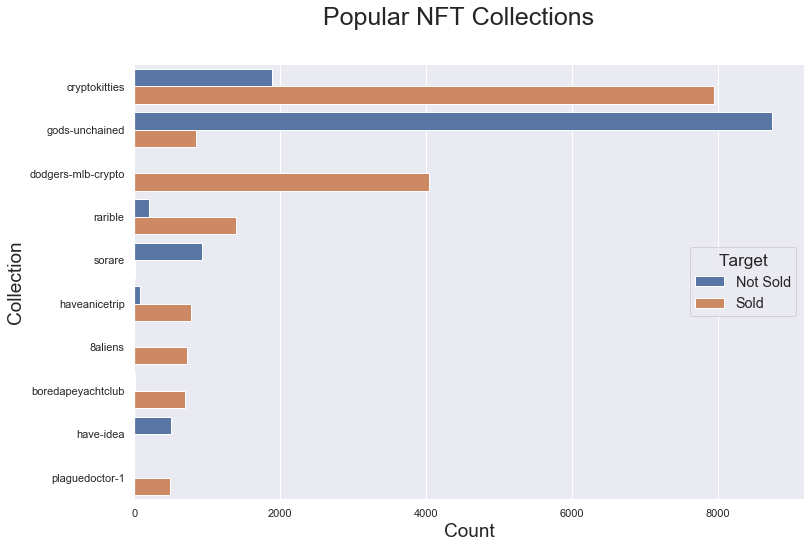

In [57]:
fig, ax = plt.subplots(figsize=(12,8))
sns.set(style="darkgrid")
sns.countplot(data=df,
              y='collection.slug',
              hue='target',
              order=df['collection.slug'].value_counts().iloc[:10].index, 
              ax=ax)
fig.suptitle('Popular NFT Collections', fontsize=25)
ax.set_xlabel('Count', fontsize=19)
ax.set_ylabel('Collection', fontsize=19)
plt.legend(title='Target', 
           title_fontsize = 'x-large',
           labels=['Not Sold', 'Sold'],
           fontsize="large", 
           loc='best')

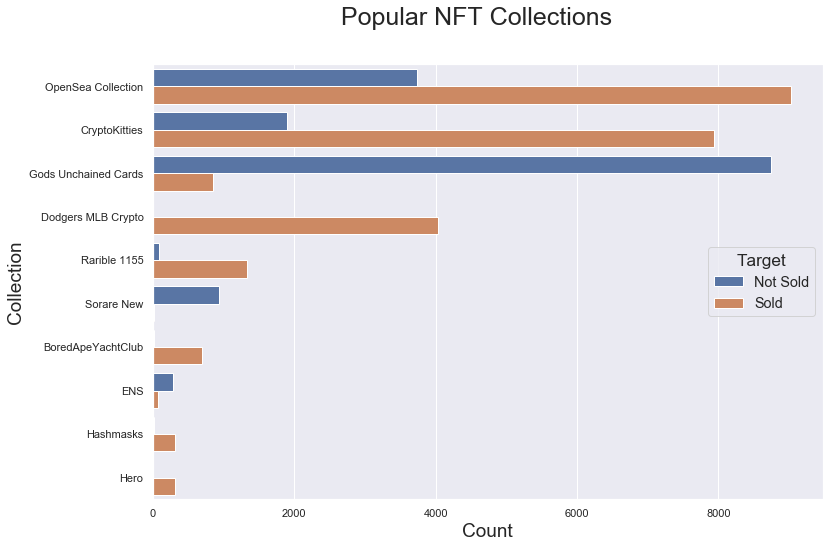

In [66]:
fig, ax = plt.subplots(figsize=(12,8))
sns.set(style="darkgrid")
sns.countplot(data=df,
              y='asset_contract.name',
              hue='target',
              order=df['asset_contract.name'].value_counts().iloc[:10].index, 
              ax=ax)
fig.suptitle('Popular NFT Collections', fontsize=25)
ax.set_xlabel('Count', fontsize=19)
ax.set_ylabel('Collection', fontsize=19)
plt.legend(title='Target', 
           title_fontsize = 'x-large',
           labels=['Not Sold', 'Sold'],
           fontsize="large", 
           loc='best')

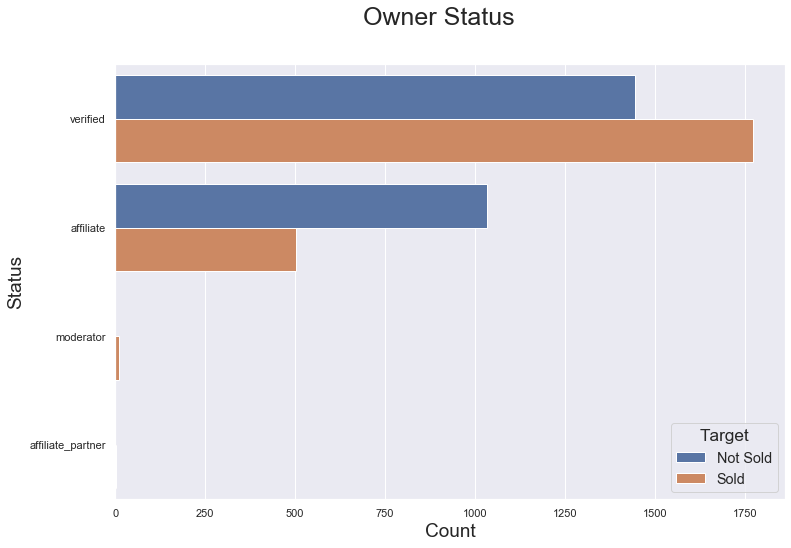

In [69]:
fig, ax = plt.subplots(figsize=(12,8))
sns.set(style="darkgrid")
sns.countplot(data=df,
              y='owner.config',
              hue='target',
              order=df['owner.config'].value_counts().iloc[:10].index, 
              ax=ax)
fig.suptitle('Owner Status', fontsize=25)
ax.set_xlabel('Count', fontsize=19)
ax.set_ylabel('Status', fontsize=19)
plt.legend(title='Target', 
           title_fontsize = 'x-large',
           labels=['Not Sold', 'Sold'],
           fontsize="large", 
           loc='lower right')

# Engineer Binary Features

## Explore

In [11]:
# find out a bit more about the dtype, uniques, counts and how many null in each column

df_isna = pd.DataFrame()

for column in df.columns:
    df_isna.loc['Type', column] = df.dtypes[column]
    df_isna.loc['Null', column] = f"{df[column].isna().sum()/len(df):.2%}"
    df_isna.loc['Count', column] = df[column].count()
    df_isna.loc['Unique', column] = df[column].nunique()

with pd.option_context('display.max_rows', 150):
    display(df_isna.T.sort_values(by=['Type','Null','Count','Unique']))

,Type,Null,Count,Unique
is_presale,bool,0.00%,44752,2
collection.featured,bool,0.00%,44752,2
asset_contract.opensea_seller_fee_basis_points,int64,0.00%,44752,2
collection.opensea_seller_fee_basis_points,int64,0.00%,44752,2
target,int64,0.00%,44752,2
asset_contract.seller_fee_basis_points,int64,0.00%,44752,14
asset_contract.dev_seller_fee_basis_points,int64,0.00%,44752,14
collection.dev_seller_fee_basis_points,int64,0.00%,44752,50
id,int64,0.00%,44752,44752
asset_contract.created_date,datetime64[ns],0.00%,44752,292


In [12]:
df.describe()

,id,asset_contract.seller_fee_basis_points,asset_contract.dev_seller_fee_basis_points,asset_contract.opensea_seller_fee_basis_points,collection.dev_seller_fee_basis_points,collection.opensea_seller_fee_basis_points,target
count,4.475200e+04,44752.000000,44752.000000,44752.000000,44752.000000,44752.000000,44752.000000
mean,1.428496e+07,283.733129,34.381145,249.351984,192.355805,249.346398,0.602766
std,1.173829e+07,148.614771,149.010796,12.711712,357.190486,12.766243,0.489331
min,8.700000e+01,250.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.695327e+06,250.000000,0.000000,250.000000,0.000000,250.000000,0.000000
50%,1.122085e+07,250.000000,0.000000,250.000000,0.000000,250.000000,1.000000
75%,3.001685e+07,250.000000,0.000000,250.000000,250.000000,250.000000,1.000000
max,3.003492e+07,1500.000000,1250.000000,250.000000,1500.000000,250.000000,1.000000


## Split columns by type

In [14]:
bool_col = []
int_col = []
time_col = []
obj_col = []

for column in df.columns:
    if df.dtypes[column] == 'bool':
        bool_col.append(column)
    elif df.dtypes[column] == 'int64':
        int_col.append(column)
    elif df.dtypes[column] == '<M8[ns]':
        time_col.append(column)
    elif df.dtypes[column] == 'object':
        obj_col.append(column)
        
print(f"Boolean = {bool_col} \n")
print(f"Integer = {int_col} \n")
print(f"Time = {time_col} \n")
print(f"Object = {obj_col} \n")

Boolean = ['is_presale', 'collection.featured'] 

Integer = ['id', 'asset_contract.seller_fee_basis_points', 'asset_contract.dev_seller_fee_basis_points', 'asset_contract.opensea_seller_fee_basis_points', 'collection.dev_seller_fee_basis_points', 'collection.opensea_seller_fee_basis_points', 'target'] 

Time = ['asset_contract.created_date', 'collection.created_date'] 

Object = ['token_id', 'name', 'traits', 'description', 'image_url', 'background_color', 'external_link', 'token_metadata', 'asset_contract.name', 'asset_contract.description', 'asset_contract.total_supply', 'asset_contract.symbol', 'asset_contract.schema_name', 'asset_contract.asset_contract_type', 'asset_contract.nft_version', 'asset_contract.opensea_version', 'asset_contract.external_link', 'asset_contract.image_url', 'collection.slug', 'collection.safelist_request_status', 'collection.description', 'collection.display_data.card_display_style', 'collection.external_url', 'collection.image_url', 'collection.large_image

### Boolean

In [15]:
df_binary = pd.DataFrame()

for column in bool_col:
    df_binary[column] = np.where(df[column] == True, 1, 0)

In [16]:
df_binary.describe()

,is_presale,collection.featured
count,44752.000000,44752.000000
mean,0.286043,0.022033
std,0.451915,0.146791
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,0.000000
max,1.000000,1.000000


### Integers

In [17]:
for col in int_col:
    display(df[col].value_counts())

30017535    1
179613      1
1450        1
30023081    1
30021032    1
           ..
6838        1
693         1
30018228    1
30028467    1
11206656    1
Name: id, Length: 44752, dtype: int64

250     41746
500      1342
1250      660
750       495
1000      247
550       187
450        24
350        20
600        18
1500        5
850         4
1350        2
950         1
875         1
Name: asset_contract.seller_fee_basis_points, dtype: int64

0       41630
250      1458
1000      660
500       495
750       247
300       187
200        24
100        20
350        18
1250        5
600         4
1100        2
700         1
625         1
Name: asset_contract.dev_seller_fee_basis_points, dtype: int64

250    44636
0        116
Name: asset_contract.opensea_seller_fee_basis_points, dtype: int64

0       32026
1000     6309
250      1839
500      1498
300       837
200       772
530       432
100       290
750       287
1          55
999        37
700        34
400        32
10         31
112        28
600        27
350        26
800        21
50         21
900        17
150        17
5          15
1250       13
690        10
1500       10
950         8
369         8
969         8
222         7
850         5
20          4
69          3
325         3
269         2
1100        2
777         2
2           2
15          2
450         1
960         1
3           1
650         1
35          1
707         1
710         1
249         1
299         1
625         1
247         1
927         1
Name: collection.dev_seller_fee_basis_points, dtype: int64

250    44635
0        117
Name: collection.opensea_seller_fee_basis_points, dtype: int64

1    26975
0    17777
Name: target, dtype: int64

In [18]:
# will set binary for int columns based on the dominant integer value which are either '0' or '250'

int_col_250 = ['asset_contract.seller_fee_basis_points',
               'asset_contract.opensea_seller_fee_basis_points',
               'collection.opensea_seller_fee_basis_points']

int_col_0 = ['asset_contract.dev_seller_fee_basis_points',
             'collection.dev_seller_fee_basis_points']

for column in int_col_0:
    df_binary[f"{column}_0"] = np.where(df[column] == 0, 1, 0)

for column in int_col_250:
    df_binary[f"{column}_250"] = np.where(df[column] == 250, 1, 0)

In [19]:
df_binary.describe()

,is_presale,collection.featured,asset_contract.dev_seller_fee_basis_points_0,collection.dev_seller_fee_basis_points_0,asset_contract.seller_fee_basis_points_250,asset_contract.opensea_seller_fee_basis_points_250,collection.opensea_seller_fee_basis_points_250
count,44752.000000,44752.000000,44752.000000,44752.000000,44752.000000,44752.000000,44752.000000
mean,0.286043,0.022033,0.930238,0.715633,0.932830,0.997408,0.997386
std,0.451915,0.146791,0.254749,0.451118,0.250319,0.050847,0.051065
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
50%,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Objects

#### No Null Values

In [20]:
for col in obj_col:
    print(f"*********** {col} ***********")
    display(df[col].value_counts())
    print("\n\n")

*********** token_id ***********


106193816756882454311635148036298702300189172230297614362597037510556567732225    1
77792207287161210101757000306204865829732738240755037479938080730372663934977     1
27997                                                                             1
1726                                                                              1
91321981255833606897973224722031697500117164304167139448040177344639183880193     1
                                                                                 ..
386923                                                                            1
84081                                                                             1
857                                                                               1
86551                                                                             1
16648448                                                                          1
Name: token_id, Length: 44752, dtype: int64




*********** name ***********


Acid Drop                            866
Ledger Legend Card                   193
Polkastarter Babydragon               37
Bitcoin Unidragon                     34
Moonrock x Morningstar Babydragon     28
                                    ... 
033 Orathai : Red Gang                 1
Sarcophagus ID #14603166               1
Thundergrey Gilded                     1
Sewer Rat 2357                         1
Burrowing Scarab ID #16338143          1
Name: name, Length: 33675, dtype: int64




*********** traits ***********


[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      




*********** description ***********


Rare Player Cards are only issued at 100 editions per season.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             871
Where are the sick - There I Am. Healing since 1619.\n                                                                    




*********** image_url ***********


https://lh3.googleusercontent.com/ZzJ1gv3qSh_ftmq_vfG6C3NsDnfTqVWzQcKad_u34sndISIFwinFgfA6cqnQxXnPQjmKB6TF0h4Oa5iPwsmi76l_If7mTfp5FW1scw     104
https://lh3.googleusercontent.com/q7YPwkm8U15AJfhA_YU_4rRcW1VuY0YnR_rMPvx9Ll4nv0h5pkSRRUsTXRIbKaVZ4HoGYPNmjVt1AJj8OdpXjOqeyZdP1EdieeJsXeY     73
https://lh3.googleusercontent.com/8oP0Kd8AWAGDn-M5XMa2E7uAwB0ZDu8MyhvYbuUfkhZcdctEYHERaDOqonN94ZAsQcu98eVjbMDoZY4BuRHpqiU                     67
https://lh3.googleusercontent.com/w2r87824INiVaa-_Yt4JVcfSoa-CzMerBedzAXXOjCm2kCJ4Vy5B-mz3Dwfslr5I226SBNII5RhA4gdU6ct9sQ4-                    62
https://lh3.googleusercontent.com/CtQ5sUHxODakndMuZtQZXjQCXXEV-j8mi7hvxGDT2NZ7FKMt4QxjgDO6rlS0tPlmrxNsmvCFhLsLIZq7hcWPH6mn                    60
                                                                                                                                            ... 
https://lh3.googleusercontent.com/G6hvrRquw-YPICkrW06zmwebmxH3KKm0PP0HJ3_Y-KZ71FEPatYveT871bdfsfiG4LNT8hUA4zcLwJTK8s4CqKBWf1CUxtAa




*********** background_color ***********


000000    9711
fcdede    1779
dfdffa    1635
cdf5d4    1621
faf4cf    1491
d1eeeb    1421
f3f2f3     946
efe1da     715
d9f5cb     496
eee9e8     281
FFFFFF     272
fadff4     230
4C47F7     192
ffffff     158
fae1ca      93
f3f3f3      38
eff1e0      27
040726      19
fbfbfb      14
e0e5fc       9
c5eefa       7
97DBD9       7
0b0c22       5
faeefa       5
f5fffa       5
a2c2eb       4
e8f2da       4
e5f3e2       3
dcebfc       3
e1eee8       3
F1F7D2       2
FBFBFB       2
FEE7C9       2
ffe8ee       2
829e90       2
232323       2
fde9e4       2
eeeeee       1
EF3500       1
072083       1
ADDFFF       1
C0C0FF       1
d4eec7       1
3E45D1       1
2c0056       1
e5e7ef       1
e4dffc       1
D1F4F9       1
Name: background_color, dtype: int64




*********** external_link ***********


https://8aliens.io                           724
https://opensea.io/CryptoRR                  432
https://totallyturtletokens.madzy.design/     86
https://www.beeple-collect.com/               85
https://chubbies.io                           81
                                            ... 
https://www.cryptokitties.co/kitty/216432      1
https://www.cryptokitties.co/kitty/236179      1
https://www.cryptokitties.co/kitty/451259      1
https://www.cryptokitties.co/kitty/439299      1
https://www.cryptokitties.co/kitty/401296      1
Name: external_link, Length: 15485, dtype: int64




*********** token_metadata ***********


https://ipfs.io/ipfs/QmWTjGKDwa7zMeM67P6K1yzpmHxSbnzkudehjspyCDtsTu                                                                    19
https://ipfs.io/ipfs/WMasterChef                                                                                                       11
https://ipfs-2.gitcoin.co:443/api/v0/cat/QmevCbVm34yDH9Y1Pm2vvK6u74DVkayM7VLYpxbhBDmn3a                                                10
https://ipfsgateway.makersplace.com/ipfs/QmemZjidihcUCeXeM5FL9VraKvPW5E9yn2vdht5Y1oheXR                                                 4
0x0001020000010000000000000000000000000000000000000000000000000000                                                                      4
                                                                                                                                       ..
https://ipfs.io/ipfs/QmVGxD3DsEadxUcoe7UUjfpggjjV4B12Y63PZ4Cg1Y7zNp                                                                     1
https://hashmap.azurewebsites.net/




*********** asset_contract.name ***********


OpenSea Collection           12760
CryptoKitties                 9836
Gods Unchained Cards          9595
Dodgers MLB Crypto            4038
Rarible 1155                  1418
                             ...  
Dogelon Mars Comic Series        1
Rarebit Bunnies                  1
SatoshiFaces                     1
DISAGREE ART Collection          1
CryptoCrawlerz                   1
Name: asset_contract.name, Length: 268, dtype: int64




*********** asset_contract.description ***********


CryptoKitties is a game centered around breedable, collectible, and oh-so-adorable creatures we call CryptoKitties! Each cat is one-of-a-kind and 100% owned by you; it cannot be replicated, taken away, or destroyed.                                                                                                                                                                                                                                                9836
Gods Unchained is a free-to-play, turn-based competitive trading card game in which cards can be bought and sold on the OpenSea marketplace. Players use their collection to build decks of cards, and select a God to play with at the start of each match. The goal of the game is to reduce your opponent's life to zero. Each deck contains exactly 30 cards. On OpenSea, cards can be sold for a fixed price, auctioned, or sold in bundles.                      9595
Create and sell digital collectibles secured with blockchain technology. Rarible




*********** asset_contract.total_supply ***********


1                                                                                 10818
0                                                                                  2148
40                                                                                  114
34                                                                                   41
5                                                                                    19
3                                                                                    18
50                                                                                   14
115792089237316195423570985008687907853269984665640564039457584007913129639935       13
28                                                                                   10
12012                                                                                 9
2                                                                                     8
16                              




*********** asset_contract.symbol ***********


OPENSTORE     12764
CKITTY         9836
DNFTCB         4038
SOR             946
BAYC            712
              ...  
ARDL              1
GABD              1
DCLRTFTKTI        1
DWORLD            1
POSITION          1
Name: asset_contract.symbol, Length: 231, dtype: int64




*********** asset_contract.schema_name ***********


ERC721         29877
ERC1155        14750
CRYPTOPUNKS      125
Name: asset_contract.schema_name, dtype: int64




*********** asset_contract.asset_contract_type ***********


non-fungible     30002
semi-fungible    14750
Name: asset_contract.asset_contract_type, dtype: int64




*********** asset_contract.nft_version ***********


3.0            19512
1.0            10040
unsupported      465
Name: asset_contract.nft_version, dtype: int64




*********** asset_contract.opensea_version ***********


2.0.0    12764
2.0.2       24
1.2.0        3
Name: asset_contract.opensea_version, dtype: int64




*********** asset_contract.external_link ***********


https://www.cryptokitties.co/                                                    9836
https://godsunchained.com/?refcode=0x5b3256965e7C3cF26E11FCAf296DfC8807C01073    9595
https://rarible.com/                                                             1620
https://sorare.com                                                                946
http://www.boredapeyachtclub.com/                                                 712
                                                                                 ... 
https://niftygateway.com/collections/rtfktfewo                                      1
https://www.trevorjonesart.com/                                                     1
http://www.degenarts.com                                                            1
https://www.evolution.land                                                          1
http://charged.fi                                                                   1
Name: asset_contract.external_link, Length: 215, dtype




*********** asset_contract.image_url ***********


https://lh3.googleusercontent.com/C272ZRW1RGGef9vKMePFSCeKc1Lw6U40wl9ofNVxzUxFdj84hH9xJRQNf-7wgs7W8qw8RWe-1ybKp-VKuU5D-tg=s60                    9836
https://lh3.googleusercontent.com/yArciVdcDv3O2R-O8XCxx3YEYZdzpiCMdossjUgv0kpLIluUQ1bYN_dyEk5xcvBEOgeq0zNIoWOh7TL9DvUEv--OLQ=s60                 9595
https://lh3.googleusercontent.com/FG0QJ00fN3c_FWuPeUr9-T__iQl63j9hn5d6svW8UqOmia5zp3lKHPkJuHcvhZ0f_Pd6P2COo9tt9zVUvdPxG_9BBw=s60                 1620
https://lh3.googleusercontent.com/gj47nmAR3valkmpVbwamiuTJfWEWSCyVeORdjM6DRWrZ1o8WaqBxFXmpBrzZnGoWaPwq1Y0jiXRrBLbnLcawAp92=s120                   946
https://lh3.googleusercontent.com/Ju9CkWtV-1Okvf45wo8UctR-M9He2PjILP0oOvxE89AyiPPGtrR3gysu1Zgy0hjd2xKIgjJJtWIc0ybj4Vd7wv8t3pxDGHoJBzDB=s120       712
                                                                                                                                                 ... 
https://lh3.googleusercontent.com/Mvj4Vl9r1naMzisZlKrOOM1HcYaKbi2df8IQZXyCW_PfvBcQem1SFEeWYSwKr6rwe6




*********** collection.slug ***********


cryptokitties                               9836
gods-unchained                              9595
dodgers-mlb-crypto                          4038
rarible                                     1605
sorare                                       946
                                            ... 
t206-big-tobacco-card-nft-set-4baseknock       1
jason-paige-nfts                               1
myth-s-end                                     1
1001-dagssons                                  1
cryptocartridges                               1
Name: collection.slug, Length: 2791, dtype: int64




*********** collection.safelist_request_status ***********


verified         27387
not_requested    14253
approved          2928
requested          184
Name: collection.safelist_request_status, dtype: int64




*********** collection.description ***********


CryptoKitties is a game centered around breedable, collectible, and oh-so-adorable creatures we call CryptoKitties! Each cat is one-of-a-kind and 100% owned by you; it cannot be replicated, taken away, or destroyed.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    9836
Gods Unchained is a free




*********** collection.display_data.card_display_style ***********


contain    24252
padded     11505
cover       4194
Name: collection.display_data.card_display_style, dtype: int64




*********** collection.external_url ***********


https://www.cryptokitties.co/                                                    9836
https://godsunchained.com/?refcode=0x5b3256965e7C3cF26E11FCAf296DfC8807C01073    9595
https://rarible.com/                                                             1605
https://sorare.com                                                                946
https://8aliens.io/                                                               724
                                                                                 ... 
http://www.letmeout.productions                                                     1
http://mathwallet.org                                                               1
http://sitography.art/                                                              1
https://instagram.com/imintouart                                                    1
http://pulsetv.com                                                                  1
Name: collection.external_url, Length: 1064, dtype: in




*********** collection.image_url ***********


https://lh3.googleusercontent.com/C272ZRW1RGGef9vKMePFSCeKc1Lw6U40wl9ofNVxzUxFdj84hH9xJRQNf-7wgs7W8qw8RWe-1ybKp-VKuU5D-tg=s60                     9836
https://lh3.googleusercontent.com/yArciVdcDv3O2R-O8XCxx3YEYZdzpiCMdossjUgv0kpLIluUQ1bYN_dyEk5xcvBEOgeq0zNIoWOh7TL9DvUEv--OLQ=s60                  9595
https://lh3.googleusercontent.com/FG0QJ00fN3c_FWuPeUr9-T__iQl63j9hn5d6svW8UqOmia5zp3lKHPkJuHcvhZ0f_Pd6P2COo9tt9zVUvdPxG_9BBw=s60                  1605
https://lh3.googleusercontent.com/gj47nmAR3valkmpVbwamiuTJfWEWSCyVeORdjM6DRWrZ1o8WaqBxFXmpBrzZnGoWaPwq1Y0jiXRrBLbnLcawAp92=s120                    946
https://lh3.googleusercontent.com/WQXdqF_-CVV1dgwOfQw2-hcg_2zU-vanX5i7k-q_JdxT10qFV7M36nUUxPz7URBT9jd6vNLPmuXDETm7OZ1-n9J-ksvxNLfYgE636V4=s120     866
                                                                                                                                                  ... 
https://lh3.googleusercontent.com/SARC8T-O0Lvsrsk-__SYTD9N33lTSybzu-PLgYwZw0LLT4iu3gyW3BeyHKmv




*********** collection.large_image_url ***********


https://lh3.googleusercontent.com/C272ZRW1RGGef9vKMePFSCeKc1Lw6U40wl9ofNVxzUxFdj84hH9xJRQNf-7wgs7W8qw8RWe-1ybKp-VKuU5D-tg                         9836
https://lh3.googleusercontent.com/yArciVdcDv3O2R-O8XCxx3YEYZdzpiCMdossjUgv0kpLIluUQ1bYN_dyEk5xcvBEOgeq0zNIoWOh7TL9DvUEv--OLQ                      9595
https://lh3.googleusercontent.com/FG0QJ00fN3c_FWuPeUr9-T__iQl63j9hn5d6svW8UqOmia5zp3lKHPkJuHcvhZ0f_Pd6P2COo9tt9zVUvdPxG_9BBw                      1605
https://lh3.googleusercontent.com/nXNnPXj42KX4PACc4LP9ijCvWLY7xIgHihKk17ON3t9MEZIWBULQRp6kuo4ATsXOIQJGc37HVnrk4dRLzw3x1403aQv2luEM7QPr=s300        946
https://lh3.googleusercontent.com/pWPnZ4B9ECYX0IqhLSEUir5lJXmjdyAwbaWJg4JVDI-7DWNDwX4DZObF8KVbw8_uXYVwYV7ORRy6AMT_gPfryN-1G9dE1V5myM5nkQ=s300      724
                                                                                                                                                  ... 
https://lh3.googleusercontent.com/HtGwqztozgF_OPgmPJncNiypOCgJCaaGJEK7zkvPQAihXEoL_zVqztK4-k2c




*********** collection.display_data.images ***********


[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      




*********** collection.twitter_username ***********


CryptoKitties                        9836
GodsUnchained                        9595
rariblecom                           1605
SorareHQ                              946
https://twitter.com/nftcybermafia     866
                                     ... 
Strongblock_io                          1
theadoption_io                          1
artbynelly                              1
ProofofWorkJerr                         1
https://twitter.com/_Crypto_freak       1
Name: collection.twitter_username, Length: 1199, dtype: int64




*********** collection.instagram_username ***********


cybermafia.nft         866
boredapeyachtclub      712
cryptohamsters         492
cryptorr78             432
zwmalachite            169
                      ... 
alyseng/                 1
sickpencil               1
kandymagazine            1
budobrothers             1
OpenWorlArtOfficial      1
Name: collection.instagram_username, Length: 567, dtype: int64




*********** collection.discord_url ***********


https://discord.gg/cryptokitties    9836
https://discord.gg/godsunchained    9595
https://discord.gg/tsjtham           946
https://discord.gg/j9d9c6M8Tr        724
https://discord.gg/3P5K3dzgdB        712
                                    ... 
https://discord.gg/_grif               1
https://discord.gg/AyX5QRw             1
https://discord.gg/YrB6scuEgC          1
https://discord.gg/Zp8KPJB             1
https://discord.gg/Wn7VwxQ67W          1
Name: collection.discord_url, Length: 357, dtype: int64




*********** collection.telegram_url ***********


https://t.me/rarible              1605
https://t.me/sorarefc              946
https://t.me/Daniel78Raymond       432
https://t.me//                     270
https://t.me/polychainmonsters     254
                                  ... 
https://t.me/matigonzale             1
https://t.me/ahegaodao               1
https://t.me/cgcortex                1
https://t.me/FEGchat                 1
https://t.me/Kromchik                1
Name: collection.telegram_url, Length: 198, dtype: int64




*********** collection.medium_username ***********


rarible                      1605
the-ethereum-name-service     358
polychainmonsters             254
sandbox-game                  185
pixelfigures                  126
                             ... 
thebfstudio                     1
arashpirsalehi                  1
cell-land                       1
averyfamous                     1
@meetcastrofrank                1
Name: collection.medium_username, Length: 143, dtype: int64




*********** collection.chat_url ***********


https://discord.gg/FpN2ws6    946
Name: collection.chat_url, dtype: int64




*********** creator.user.username ***********


0x3ee5c5f600a019a68a43c61e5966e0b3e8c6ce71    4048
cybermafia                                     866
Heptalabs                                      724
HAVE_IDEA                                      505
PlagueDr                                       495
                                              ... 
rafaelcarlesso                                   1
LiLaLaunebaer                                    1
Beezer                                           1
Greemgreegoart                                   1
ross_VRON                                        1
Name: creator.user.username, Length: 4266, dtype: int64




*********** creator.config ***********


verified             1329
affiliate             325
moderator              12
affiliate_partner       3
Name: creator.config, dtype: int64




*********** creator.profile_img_url ***********


https://storage.googleapis.com/opensea-static/opensea-profile/3.png     19767
https://storage.googleapis.com/opensea-static/opensea-profile/30.png     5248
https://storage.googleapis.com/opensea-static/opensea-profile/7.png      1619
https://storage.googleapis.com/opensea-static/opensea-profile/14.png     1280
https://storage.googleapis.com/opensea-static/opensea-profile/23.png     1239
https://storage.googleapis.com/opensea-static/opensea-profile/16.png     1225
https://storage.googleapis.com/opensea-static/opensea-profile/27.png      960
https://storage.googleapis.com/opensea-static/opensea-profile/12.png      905
https://storage.googleapis.com/opensea-static/opensea-profile/22.png      855
https://storage.googleapis.com/opensea-static/opensea-profile/24.png      841
https://storage.googleapis.com/opensea-static/opensea-profile/28.png      831
https://storage.googleapis.com/opensea-static/opensea-profile/4.png       711
https://storage.googleapis.com/opensea-static/opensea-profile/26




*********** creator.discord_id ***********


@RobGronkowski          45
Instagram fiedler.jp    27
@kevinabosch            24
@DrakeBell              16
@sabet                  15
@vhils1                 10
@CbHoyo                  8
@adamlucasNYC            8
@justinkan               6
@Cryptopathic            5
395737001225355275       4
Katttykattt#2416         4
@Crypto_Kobe_            4
Instagram thatsval V     4
@wizardofsoho            4
@WebbEmotional           3
@msp4rro                 3
@bobbibillard            3
419625211588116481       2
650843151266742292       2
101723492973559808       2
@ExtendedVictory         2
@DBlockEurope            2
@godfreymeyer            2
@wivteam                 2
Diana Art #4099          2
PaartiLive               2
@SatoshiLite             1
@zachwinterton           1
edd#1977                 1
Rarebits #0901           1
davidfirth66             1
@seanbonner              1
@iSpaceCrypto            1
Instagram meowyoface     1
@PuffyPuffPuff1          1
@MarcTaraz               1
@




*********** owner.address ***********


0x0000000000000000000000000000000000000000    14827
0xb1690c08e213a35ed9bab7b318de14420fb57d8c     2454
0x327305a797d92a39cee1a225d7e2a1cc42b1a8fa      915
0xc7af99fe5513eb6710e6d5f44f9989da40f27f26      466
0x555e86f9ada1caaaf8ef084d6e8d9306daffdabe      222
                                              ...  
0xef64f0b9be2a036f1b45f26000a8e1136e57ebe6        1
0xca55e62dc406b633514edf33d249063f82cf1311        1
0x983110309620d911731ac0932219af06091b6744        1
0x49e74e31787734c3543e99bfacd457cb8286b239        1
0x895b137af69110f0551351512b24e09498820721        1
Name: owner.address, Length: 11452, dtype: int64




*********** owner.config ***********


verified             3219
affiliate            1537
moderator              10
affiliate_partner       2
Name: owner.config, dtype: int64




*********** owner.profile_img_url ***********


https://storage.googleapis.com/opensea-static/opensea-profile/1.png     15706
https://storage.googleapis.com/opensea-static/opensea-profile/26.png     3168
https://storage.googleapis.com/opensea-static/opensea-profile/7.png      2018
https://storage.googleapis.com/opensea-static/opensea-profile/12.png     1119
https://storage.googleapis.com/opensea-static/opensea-profile/33.png     1016
https://storage.googleapis.com/opensea-static/opensea-profile/15.png      997
https://storage.googleapis.com/opensea-static/opensea-profile/25.png      986
https://storage.googleapis.com/opensea-static/opensea-profile/22.png      952
https://storage.googleapis.com/opensea-static/opensea-profile/24.png      943
https://storage.googleapis.com/opensea-static/opensea-profile/17.png      929
https://storage.googleapis.com/opensea-static/opensea-profile/18.png      873
https://storage.googleapis.com/opensea-static/opensea-profile/20.png      847
https://storage.googleapis.com/opensea-static/opensea-profile/3.




*********** owner.discord_id ***********


@kevinabosch           24
cloudwhite☁|OpenSea    15
419625211588116481      5
499194181533564949      3
387325865077243924      1
@mera_takeru            1
391063760317448204      1
@sabet                  1
Name: owner.discord_id, dtype: int64

In [21]:
# dilineate objects that have no null values and custom determine best way to create binary encoding

obj_col_nonull = ['asset_contract.asset_contract_type', # 0 = 'semi-fungible', 1 = 'non-fungible'
                  'asset_contract.schema_name', # 0 = ERC1155
                  'collection.safelist_request_status', # 0 = 'verified' | 'approved'
                  'owner.profile_img_url', # 1 = 'https://storage.googleapis.com/opensea-static/opensea-profile/1.png'
                  'asset_contract.name', # 1 = 'OpenSea Collection'
                  'collection.slug', # 1 = 'cryptokitties' | 'gods-unchained' 
                  'owner.address', # 1 = '0x0000000000000000000000000000000000000000'
                  'traits', # 0 = '[]'
                  'token_id', # NOT USING
                  'creator.profile_img_url'] # 1 = 'https://storage.googleapis.com/opensea-static/opensea-profile/3.png'

for col in obj_col_nonull:
    print(f"*********** {col} ***********")
    display(df[col].value_counts())
    print("\n\n")

*********** asset_contract.asset_contract_type ***********


non-fungible     30002
semi-fungible    14750
Name: asset_contract.asset_contract_type, dtype: int64




*********** asset_contract.schema_name ***********


ERC721         29877
ERC1155        14750
CRYPTOPUNKS      125
Name: asset_contract.schema_name, dtype: int64




*********** collection.safelist_request_status ***********


verified         27387
not_requested    14253
approved          2928
requested          184
Name: collection.safelist_request_status, dtype: int64




*********** owner.profile_img_url ***********


https://storage.googleapis.com/opensea-static/opensea-profile/1.png     15706
https://storage.googleapis.com/opensea-static/opensea-profile/26.png     3168
https://storage.googleapis.com/opensea-static/opensea-profile/7.png      2018
https://storage.googleapis.com/opensea-static/opensea-profile/12.png     1119
https://storage.googleapis.com/opensea-static/opensea-profile/33.png     1016
https://storage.googleapis.com/opensea-static/opensea-profile/15.png      997
https://storage.googleapis.com/opensea-static/opensea-profile/25.png      986
https://storage.googleapis.com/opensea-static/opensea-profile/22.png      952
https://storage.googleapis.com/opensea-static/opensea-profile/24.png      943
https://storage.googleapis.com/opensea-static/opensea-profile/17.png      929
https://storage.googleapis.com/opensea-static/opensea-profile/18.png      873
https://storage.googleapis.com/opensea-static/opensea-profile/20.png      847
https://storage.googleapis.com/opensea-static/opensea-profile/3.




*********** asset_contract.name ***********


OpenSea Collection           12760
CryptoKitties                 9836
Gods Unchained Cards          9595
Dodgers MLB Crypto            4038
Rarible 1155                  1418
                             ...  
Dogelon Mars Comic Series        1
Rarebit Bunnies                  1
SatoshiFaces                     1
DISAGREE ART Collection          1
CryptoCrawlerz                   1
Name: asset_contract.name, Length: 268, dtype: int64




*********** collection.slug ***********


cryptokitties                               9836
gods-unchained                              9595
dodgers-mlb-crypto                          4038
rarible                                     1605
sorare                                       946
                                            ... 
t206-big-tobacco-card-nft-set-4baseknock       1
jason-paige-nfts                               1
myth-s-end                                     1
1001-dagssons                                  1
cryptocartridges                               1
Name: collection.slug, Length: 2791, dtype: int64




*********** owner.address ***********


0x0000000000000000000000000000000000000000    14827
0xb1690c08e213a35ed9bab7b318de14420fb57d8c     2454
0x327305a797d92a39cee1a225d7e2a1cc42b1a8fa      915
0xc7af99fe5513eb6710e6d5f44f9989da40f27f26      466
0x555e86f9ada1caaaf8ef084d6e8d9306daffdabe      222
                                              ...  
0xef64f0b9be2a036f1b45f26000a8e1136e57ebe6        1
0xca55e62dc406b633514edf33d249063f82cf1311        1
0x983110309620d911731ac0932219af06091b6744        1
0x49e74e31787734c3543e99bfacd457cb8286b239        1
0x895b137af69110f0551351512b24e09498820721        1
Name: owner.address, Length: 11452, dtype: int64




*********** traits ***********


[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      




*********** token_id ***********


106193816756882454311635148036298702300189172230297614362597037510556567732225    1
77792207287161210101757000306204865829732738240755037479938080730372663934977     1
27997                                                                             1
1726                                                                              1
91321981255833606897973224722031697500117164304167139448040177344639183880193     1
                                                                                 ..
386923                                                                            1
84081                                                                             1
857                                                                               1
86551                                                                             1
16648448                                                                          1
Name: token_id, Length: 44752, dtype: int64




*********** creator.profile_img_url ***********


https://storage.googleapis.com/opensea-static/opensea-profile/3.png     19767
https://storage.googleapis.com/opensea-static/opensea-profile/30.png     5248
https://storage.googleapis.com/opensea-static/opensea-profile/7.png      1619
https://storage.googleapis.com/opensea-static/opensea-profile/14.png     1280
https://storage.googleapis.com/opensea-static/opensea-profile/23.png     1239
https://storage.googleapis.com/opensea-static/opensea-profile/16.png     1225
https://storage.googleapis.com/opensea-static/opensea-profile/27.png      960
https://storage.googleapis.com/opensea-static/opensea-profile/12.png      905
https://storage.googleapis.com/opensea-static/opensea-profile/22.png      855
https://storage.googleapis.com/opensea-static/opensea-profile/24.png      841
https://storage.googleapis.com/opensea-static/opensea-profile/28.png      831
https://storage.googleapis.com/opensea-static/opensea-profile/4.png       711
https://storage.googleapis.com/opensea-static/opensea-profile/26

In [22]:
df['asset_contract.name'].value_counts(normalize = True)

OpenSea Collection           0.285127
CryptoKitties                0.219789
Gods Unchained Cards         0.214404
Dodgers MLB Crypto           0.090231
Rarible 1155                 0.031686
                               ...   
Dogelon Mars Comic Series    0.000022
Rarebit Bunnies              0.000022
SatoshiFaces                 0.000022
DISAGREE ART Collection      0.000022
CryptoCrawlerz               0.000022
Name: asset_contract.name, Length: 268, dtype: float64

In [23]:
df['collection.slug'].value_counts(normalize = True)

cryptokitties                               0.219789
gods-unchained                              0.214404
dodgers-mlb-crypto                          0.090231
rarible                                     0.035864
sorare                                      0.021139
                                              ...   
t206-big-tobacco-card-nft-set-4baseknock    0.000022
jason-paige-nfts                            0.000022
myth-s-end                                  0.000022
1001-dagssons                               0.000022
cryptocartridges                            0.000022
Name: collection.slug, Length: 2791, dtype: float64

In [24]:
# This will be the initial binary values for the object columns containing no null values

obj_nonull = [['asset_contract.asset_contract_type', ['semi-fungible'], 0, 1],
              ['asset_contract.schema_name', ['ERC1155'], 0, 1],
              ['asset_contract.name', ['OpenSea Collection'], 1, 0],
              ['collection.safelist_request_status', ['verified','approved'], 0, 1],
              ['collection.slug', ['cryptokitties', 'gods-unchained'], 1, 0],
              ['creator.profile_img_url', ['https://storage.googleapis.com/opensea-static/opensea-profile/3.png'], 1, 0],
              ['owner.address', ['0x0000000000000000000000000000000000000000'], 1, 0],
              ['owner.profile_img_url', ['https://storage.googleapis.com/opensea-static/opensea-profile/1.png'], 1, 0],
              ['traits', ['[]'], 0, 1]]

In [25]:
for list in obj_nonull:
    df_binary[list[0]] = np.where(df[list[0]].isin(list[1]), list[2], list[3])

In [26]:
df_binary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44752 entries, 0 to 44751
Data columns (total 16 columns):
is_presale                                            44752 non-null int64
collection.featured                                   44752 non-null int64
asset_contract.dev_seller_fee_basis_points_0          44752 non-null int64
collection.dev_seller_fee_basis_points_0              44752 non-null int64
asset_contract.seller_fee_basis_points_250            44752 non-null int64
asset_contract.opensea_seller_fee_basis_points_250    44752 non-null int64
collection.opensea_seller_fee_basis_points_250        44752 non-null int64
asset_contract.asset_contract_type                    44752 non-null int64
asset_contract.schema_name                            44752 non-null int64
asset_contract.name                                   44752 non-null int64
collection.safelist_request_status                    44752 non-null int64
collection.slug                                       44752 non-nu

#### With Nulls

In [27]:
obj_col_withnull = np.setdiff1d(obj_col, obj_col_nonull).tolist()

In [28]:
for col in obj_col_withnull:
    print(f"*********** {col} ***********")
    display(df[col].value_counts())
    print("\n\n")

*********** asset_contract.description ***********


CryptoKitties is a game centered around breedable, collectible, and oh-so-adorable creatures we call CryptoKitties! Each cat is one-of-a-kind and 100% owned by you; it cannot be replicated, taken away, or destroyed.                                                                                                                                                                                                                                                9836
Gods Unchained is a free-to-play, turn-based competitive trading card game in which cards can be bought and sold on the OpenSea marketplace. Players use their collection to build decks of cards, and select a God to play with at the start of each match. The goal of the game is to reduce your opponent's life to zero. Each deck contains exactly 30 cards. On OpenSea, cards can be sold for a fixed price, auctioned, or sold in bundles.                      9595
Create and sell digital collectibles secured with blockchain technology. Rarible




*********** asset_contract.external_link ***********


https://www.cryptokitties.co/                                                    9836
https://godsunchained.com/?refcode=0x5b3256965e7C3cF26E11FCAf296DfC8807C01073    9595
https://rarible.com/                                                             1620
https://sorare.com                                                                946
http://www.boredapeyachtclub.com/                                                 712
                                                                                 ... 
https://niftygateway.com/collections/rtfktfewo                                      1
https://www.trevorjonesart.com/                                                     1
http://www.degenarts.com                                                            1
https://www.evolution.land                                                          1
http://charged.fi                                                                   1
Name: asset_contract.external_link, Length: 215, dtype




*********** asset_contract.image_url ***********


https://lh3.googleusercontent.com/C272ZRW1RGGef9vKMePFSCeKc1Lw6U40wl9ofNVxzUxFdj84hH9xJRQNf-7wgs7W8qw8RWe-1ybKp-VKuU5D-tg=s60                    9836
https://lh3.googleusercontent.com/yArciVdcDv3O2R-O8XCxx3YEYZdzpiCMdossjUgv0kpLIluUQ1bYN_dyEk5xcvBEOgeq0zNIoWOh7TL9DvUEv--OLQ=s60                 9595
https://lh3.googleusercontent.com/FG0QJ00fN3c_FWuPeUr9-T__iQl63j9hn5d6svW8UqOmia5zp3lKHPkJuHcvhZ0f_Pd6P2COo9tt9zVUvdPxG_9BBw=s60                 1620
https://lh3.googleusercontent.com/gj47nmAR3valkmpVbwamiuTJfWEWSCyVeORdjM6DRWrZ1o8WaqBxFXmpBrzZnGoWaPwq1Y0jiXRrBLbnLcawAp92=s120                   946
https://lh3.googleusercontent.com/Ju9CkWtV-1Okvf45wo8UctR-M9He2PjILP0oOvxE89AyiPPGtrR3gysu1Zgy0hjd2xKIgjJJtWIc0ybj4Vd7wv8t3pxDGHoJBzDB=s120       712
                                                                                                                                                 ... 
https://lh3.googleusercontent.com/Mvj4Vl9r1naMzisZlKrOOM1HcYaKbi2df8IQZXyCW_PfvBcQem1SFEeWYSwKr6rwe6




*********** asset_contract.nft_version ***********


3.0            19512
1.0            10040
unsupported      465
Name: asset_contract.nft_version, dtype: int64




*********** asset_contract.opensea_version ***********


2.0.0    12764
2.0.2       24
1.2.0        3
Name: asset_contract.opensea_version, dtype: int64




*********** asset_contract.symbol ***********


OPENSTORE     12764
CKITTY         9836
DNFTCB         4038
SOR             946
BAYC            712
              ...  
ARDL              1
GABD              1
DCLRTFTKTI        1
DWORLD            1
POSITION          1
Name: asset_contract.symbol, Length: 231, dtype: int64




*********** asset_contract.total_supply ***********


1                                                                                 10818
0                                                                                  2148
40                                                                                  114
34                                                                                   41
5                                                                                    19
3                                                                                    18
50                                                                                   14
115792089237316195423570985008687907853269984665640564039457584007913129639935       13
28                                                                                   10
12012                                                                                 9
2                                                                                     8
16                              




*********** background_color ***********


000000    9711
fcdede    1779
dfdffa    1635
cdf5d4    1621
faf4cf    1491
d1eeeb    1421
f3f2f3     946
efe1da     715
d9f5cb     496
eee9e8     281
FFFFFF     272
fadff4     230
4C47F7     192
ffffff     158
fae1ca      93
f3f3f3      38
eff1e0      27
040726      19
fbfbfb      14
e0e5fc       9
c5eefa       7
97DBD9       7
0b0c22       5
faeefa       5
f5fffa       5
a2c2eb       4
e8f2da       4
e5f3e2       3
dcebfc       3
e1eee8       3
F1F7D2       2
FBFBFB       2
FEE7C9       2
ffe8ee       2
829e90       2
232323       2
fde9e4       2
eeeeee       1
EF3500       1
072083       1
ADDFFF       1
C0C0FF       1
d4eec7       1
3E45D1       1
2c0056       1
e5e7ef       1
e4dffc       1
D1F4F9       1
Name: background_color, dtype: int64




*********** collection.chat_url ***********


https://discord.gg/FpN2ws6    946
Name: collection.chat_url, dtype: int64




*********** collection.description ***********


CryptoKitties is a game centered around breedable, collectible, and oh-so-adorable creatures we call CryptoKitties! Each cat is one-of-a-kind and 100% owned by you; it cannot be replicated, taken away, or destroyed.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    9836
Gods Unchained is a free




*********** collection.discord_url ***********


https://discord.gg/cryptokitties    9836
https://discord.gg/godsunchained    9595
https://discord.gg/tsjtham           946
https://discord.gg/j9d9c6M8Tr        724
https://discord.gg/3P5K3dzgdB        712
                                    ... 
https://discord.gg/_grif               1
https://discord.gg/AyX5QRw             1
https://discord.gg/YrB6scuEgC          1
https://discord.gg/Zp8KPJB             1
https://discord.gg/Wn7VwxQ67W          1
Name: collection.discord_url, Length: 357, dtype: int64




*********** collection.display_data.card_display_style ***********


contain    24252
padded     11505
cover       4194
Name: collection.display_data.card_display_style, dtype: int64




*********** collection.display_data.images ***********


[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      




*********** collection.external_url ***********


https://www.cryptokitties.co/                                                    9836
https://godsunchained.com/?refcode=0x5b3256965e7C3cF26E11FCAf296DfC8807C01073    9595
https://rarible.com/                                                             1605
https://sorare.com                                                                946
https://8aliens.io/                                                               724
                                                                                 ... 
http://www.letmeout.productions                                                     1
http://mathwallet.org                                                               1
http://sitography.art/                                                              1
https://instagram.com/imintouart                                                    1
http://pulsetv.com                                                                  1
Name: collection.external_url, Length: 1064, dtype: in




*********** collection.image_url ***********


https://lh3.googleusercontent.com/C272ZRW1RGGef9vKMePFSCeKc1Lw6U40wl9ofNVxzUxFdj84hH9xJRQNf-7wgs7W8qw8RWe-1ybKp-VKuU5D-tg=s60                     9836
https://lh3.googleusercontent.com/yArciVdcDv3O2R-O8XCxx3YEYZdzpiCMdossjUgv0kpLIluUQ1bYN_dyEk5xcvBEOgeq0zNIoWOh7TL9DvUEv--OLQ=s60                  9595
https://lh3.googleusercontent.com/FG0QJ00fN3c_FWuPeUr9-T__iQl63j9hn5d6svW8UqOmia5zp3lKHPkJuHcvhZ0f_Pd6P2COo9tt9zVUvdPxG_9BBw=s60                  1605
https://lh3.googleusercontent.com/gj47nmAR3valkmpVbwamiuTJfWEWSCyVeORdjM6DRWrZ1o8WaqBxFXmpBrzZnGoWaPwq1Y0jiXRrBLbnLcawAp92=s120                    946
https://lh3.googleusercontent.com/WQXdqF_-CVV1dgwOfQw2-hcg_2zU-vanX5i7k-q_JdxT10qFV7M36nUUxPz7URBT9jd6vNLPmuXDETm7OZ1-n9J-ksvxNLfYgE636V4=s120     866
                                                                                                                                                  ... 
https://lh3.googleusercontent.com/SARC8T-O0Lvsrsk-__SYTD9N33lTSybzu-PLgYwZw0LLT4iu3gyW3BeyHKmv




*********** collection.instagram_username ***********


cybermafia.nft         866
boredapeyachtclub      712
cryptohamsters         492
cryptorr78             432
zwmalachite            169
                      ... 
alyseng/                 1
sickpencil               1
kandymagazine            1
budobrothers             1
OpenWorlArtOfficial      1
Name: collection.instagram_username, Length: 567, dtype: int64




*********** collection.large_image_url ***********


https://lh3.googleusercontent.com/C272ZRW1RGGef9vKMePFSCeKc1Lw6U40wl9ofNVxzUxFdj84hH9xJRQNf-7wgs7W8qw8RWe-1ybKp-VKuU5D-tg                         9836
https://lh3.googleusercontent.com/yArciVdcDv3O2R-O8XCxx3YEYZdzpiCMdossjUgv0kpLIluUQ1bYN_dyEk5xcvBEOgeq0zNIoWOh7TL9DvUEv--OLQ                      9595
https://lh3.googleusercontent.com/FG0QJ00fN3c_FWuPeUr9-T__iQl63j9hn5d6svW8UqOmia5zp3lKHPkJuHcvhZ0f_Pd6P2COo9tt9zVUvdPxG_9BBw                      1605
https://lh3.googleusercontent.com/nXNnPXj42KX4PACc4LP9ijCvWLY7xIgHihKk17ON3t9MEZIWBULQRp6kuo4ATsXOIQJGc37HVnrk4dRLzw3x1403aQv2luEM7QPr=s300        946
https://lh3.googleusercontent.com/pWPnZ4B9ECYX0IqhLSEUir5lJXmjdyAwbaWJg4JVDI-7DWNDwX4DZObF8KVbw8_uXYVwYV7ORRy6AMT_gPfryN-1G9dE1V5myM5nkQ=s300      724
                                                                                                                                                  ... 
https://lh3.googleusercontent.com/HtGwqztozgF_OPgmPJncNiypOCgJCaaGJEK7zkvPQAihXEoL_zVqztK4-k2c




*********** collection.medium_username ***********


rarible                      1605
the-ethereum-name-service     358
polychainmonsters             254
sandbox-game                  185
pixelfigures                  126
                             ... 
thebfstudio                     1
arashpirsalehi                  1
cell-land                       1
averyfamous                     1
@meetcastrofrank                1
Name: collection.medium_username, Length: 143, dtype: int64




*********** collection.telegram_url ***********


https://t.me/rarible              1605
https://t.me/sorarefc              946
https://t.me/Daniel78Raymond       432
https://t.me//                     270
https://t.me/polychainmonsters     254
                                  ... 
https://t.me/matigonzale             1
https://t.me/ahegaodao               1
https://t.me/cgcortex                1
https://t.me/FEGchat                 1
https://t.me/Kromchik                1
Name: collection.telegram_url, Length: 198, dtype: int64




*********** collection.twitter_username ***********


CryptoKitties                        9836
GodsUnchained                        9595
rariblecom                           1605
SorareHQ                              946
https://twitter.com/nftcybermafia     866
                                     ... 
Strongblock_io                          1
theadoption_io                          1
artbynelly                              1
ProofofWorkJerr                         1
https://twitter.com/_Crypto_freak       1
Name: collection.twitter_username, Length: 1199, dtype: int64




*********** creator.config ***********


verified             1329
affiliate             325
moderator              12
affiliate_partner       3
Name: creator.config, dtype: int64




*********** creator.discord_id ***********


@RobGronkowski          45
Instagram fiedler.jp    27
@kevinabosch            24
@DrakeBell              16
@sabet                  15
@vhils1                 10
@CbHoyo                  8
@adamlucasNYC            8
@justinkan               6
@Cryptopathic            5
395737001225355275       4
Katttykattt#2416         4
@Crypto_Kobe_            4
Instagram thatsval V     4
@wizardofsoho            4
@WebbEmotional           3
@msp4rro                 3
@bobbibillard            3
419625211588116481       2
650843151266742292       2
101723492973559808       2
@ExtendedVictory         2
@DBlockEurope            2
@godfreymeyer            2
@wivteam                 2
Diana Art #4099          2
PaartiLive               2
@SatoshiLite             1
@zachwinterton           1
edd#1977                 1
Rarebits #0901           1
davidfirth66             1
@seanbonner              1
@iSpaceCrypto            1
Instagram meowyoface     1
@PuffyPuffPuff1          1
@MarcTaraz               1
@




*********** creator.user.username ***********


0x3ee5c5f600a019a68a43c61e5966e0b3e8c6ce71    4048
cybermafia                                     866
Heptalabs                                      724
HAVE_IDEA                                      505
PlagueDr                                       495
                                              ... 
rafaelcarlesso                                   1
LiLaLaunebaer                                    1
Beezer                                           1
Greemgreegoart                                   1
ross_VRON                                        1
Name: creator.user.username, Length: 4266, dtype: int64




*********** description ***********


Rare Player Cards are only issued at 100 editions per season.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             871
Where are the sick - There I Am. Healing since 1619.\n                                                                    




*********** external_link ***********


https://8aliens.io                           724
https://opensea.io/CryptoRR                  432
https://totallyturtletokens.madzy.design/     86
https://www.beeple-collect.com/               85
https://chubbies.io                           81
                                            ... 
https://www.cryptokitties.co/kitty/216432      1
https://www.cryptokitties.co/kitty/236179      1
https://www.cryptokitties.co/kitty/451259      1
https://www.cryptokitties.co/kitty/439299      1
https://www.cryptokitties.co/kitty/401296      1
Name: external_link, Length: 15485, dtype: int64




*********** image_url ***********


https://lh3.googleusercontent.com/ZzJ1gv3qSh_ftmq_vfG6C3NsDnfTqVWzQcKad_u34sndISIFwinFgfA6cqnQxXnPQjmKB6TF0h4Oa5iPwsmi76l_If7mTfp5FW1scw     104
https://lh3.googleusercontent.com/q7YPwkm8U15AJfhA_YU_4rRcW1VuY0YnR_rMPvx9Ll4nv0h5pkSRRUsTXRIbKaVZ4HoGYPNmjVt1AJj8OdpXjOqeyZdP1EdieeJsXeY     73
https://lh3.googleusercontent.com/8oP0Kd8AWAGDn-M5XMa2E7uAwB0ZDu8MyhvYbuUfkhZcdctEYHERaDOqonN94ZAsQcu98eVjbMDoZY4BuRHpqiU                     67
https://lh3.googleusercontent.com/w2r87824INiVaa-_Yt4JVcfSoa-CzMerBedzAXXOjCm2kCJ4Vy5B-mz3Dwfslr5I226SBNII5RhA4gdU6ct9sQ4-                    62
https://lh3.googleusercontent.com/CtQ5sUHxODakndMuZtQZXjQCXXEV-j8mi7hvxGDT2NZ7FKMt4QxjgDO6rlS0tPlmrxNsmvCFhLsLIZq7hcWPH6mn                    60
                                                                                                                                            ... 
https://lh3.googleusercontent.com/G6hvrRquw-YPICkrW06zmwebmxH3KKm0PP0HJ3_Y-KZ71FEPatYveT871bdfsfiG4LNT8hUA4zcLwJTK8s4CqKBWf1CUxtAa




*********** name ***********


Acid Drop                            866
Ledger Legend Card                   193
Polkastarter Babydragon               37
Bitcoin Unidragon                     34
Moonrock x Morningstar Babydragon     28
                                    ... 
033 Orathai : Red Gang                 1
Sarcophagus ID #14603166               1
Thundergrey Gilded                     1
Sewer Rat 2357                         1
Burrowing Scarab ID #16338143          1
Name: name, Length: 33675, dtype: int64




*********** owner.config ***********


verified             3219
affiliate            1537
moderator              10
affiliate_partner       2
Name: owner.config, dtype: int64




*********** owner.discord_id ***********


@kevinabosch           24
cloudwhite☁|OpenSea    15
419625211588116481      5
499194181533564949      3
387325865077243924      1
@mera_takeru            1
391063760317448204      1
@sabet                  1
Name: owner.discord_id, dtype: int64




*********** token_metadata ***********


https://ipfs.io/ipfs/QmWTjGKDwa7zMeM67P6K1yzpmHxSbnzkudehjspyCDtsTu                                                                    19
https://ipfs.io/ipfs/WMasterChef                                                                                                       11
https://ipfs-2.gitcoin.co:443/api/v0/cat/QmevCbVm34yDH9Y1Pm2vvK6u74DVkayM7VLYpxbhBDmn3a                                                10
https://ipfsgateway.makersplace.com/ipfs/QmemZjidihcUCeXeM5FL9VraKvPW5E9yn2vdht5Y1oheXR                                                 4
0x0001020000010000000000000000000000000000000000000000000000000000                                                                      4
                                                                                                                                       ..
https://ipfs.io/ipfs/QmVGxD3DsEadxUcoe7UUjfpggjjV4B12Y63PZ4Cg1Y7zNp                                                                     1
https://hashmap.azurewebsites.net/

In [29]:
for col in obj_col_withnull:
    df_binary[col] = np.where(df[col].isna(), 0, 1)

### Add Datetime Data

In [30]:
for col in time_col:
    df_binary[col] = df[col]

## Add Target

In [31]:
df_binary['target'] = df['target']

In [32]:
df_binary.head()

,is_presale,collection.featured,asset_contract.dev_seller_fee_basis_points_0,collection.dev_seller_fee_basis_points_0,asset_contract.seller_fee_basis_points_250,asset_contract.opensea_seller_fee_basis_points_250,collection.opensea_seller_fee_basis_points_250,asset_contract.asset_contract_type,asset_contract.schema_name,asset_contract.name,...,description,external_link,image_url,name,owner.config,owner.discord_id,token_metadata,asset_contract.created_date,collection.created_date,target
0,1,0,1,0,1,1,1,0,0,1,...,0,1,1,1,0,0,0,2020-12-02 17:40:53.232025,2021-06-10 01:49:35.180218,0
1,1,0,1,0,1,1,1,0,0,1,...,1,0,1,1,0,0,0,2020-12-02 17:40:53.232025,2021-05-03 18:55:32.762585,0
2,1,0,1,1,1,1,1,0,0,1,...,1,0,1,1,0,0,0,2020-12-02 17:40:53.232025,2021-05-19 07:24:46.125544,0
3,1,0,1,1,1,1,1,0,0,1,...,1,0,1,1,0,0,0,2020-12-02 17:40:53.232025,2021-06-29 12:49:00.283468,0
4,1,0,1,0,1,1,1,0,0,1,...,0,0,1,1,0,0,0,2020-12-02 17:40:53.232025,2021-05-30 16:45:39.254227,0


# Export Data

In [33]:
df_binary.to_csv('../data/nft_binary.csv', index=False)